# CNN Proof of Concept
This notebook is used to build the Convolutional Neural Network  
and train the data on a small subset of the SALAMI public archive  
data

## Import the required libraries
TensorFlow is used for the building and training the  
model. I make use of the sklearn `train_test_split`  
function to split the data into training and validation  
sets.

In [1]:
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from modules.model import build_model

## Import the features and labels

In [15]:
x = pickle.load(open('../dumps/x.p', 'rb'))
y = pickle.load(open('../dumps/y.p', 'rb'))
x = x_new.reshape(46, 64, 32000, 1) ## add 4th dimension

## Create the test/train splits

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Build the neural network model

In [7]:
model = build_model(x_train.shape)

## Compile the model

In [11]:
sgd = tf.keras.optimizers.SGD(lr=0.05, decay=1e-4, momentum=0.9, nesterov=True)
loss='categorical_crossentropy'
model.compile(
    optimizer=sgd,
    loss=loss,
    metrics=['accuracy']
)

## Train the model

In [12]:
history = model.fit(x_train, y_train, batch_size=4, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
9/9 [==============================] - 34s 4s/step - loss: 62914334925585953431926865920.0000 - accuracy: 0.0214 - val_loss: 200976187392.0000 - val_accuracy: 0.0000e+00
Epoch 2/5
9/9 [==============================] - 33s 4s/step - loss: 13260325762898463129862144.0000 - accuracy: 0.1493 - val_loss: 13576049627586217111453696.0000 - val_accuracy: 0.0000e+00
Epoch 3/5
9/9 [==============================] - 33s 4s/step - loss: 47453762827327181800079360.0000 - accuracy: 0.2880 - val_loss: 67145115410634640147349504.0000 - val_accuracy: 0.0000e+00
Epoch 4/5
9/9 [==============================] - 32s 4s/step - loss: 85872631380698297456918528.0000 - accuracy: 0.3475 - val_loss: 372174277307487019260182528.0000 - val_accuracy: 0.6000
Epoch 5/5
9/9 [==============================] - 32s 4s/step - loss: 793716468974798488937168896.0000 - accuracy: 0.3297 - val_loss: 3692697858021980439714988032.0000 - val_accuracy: 0.6000


## Plot the test vs train accuracy

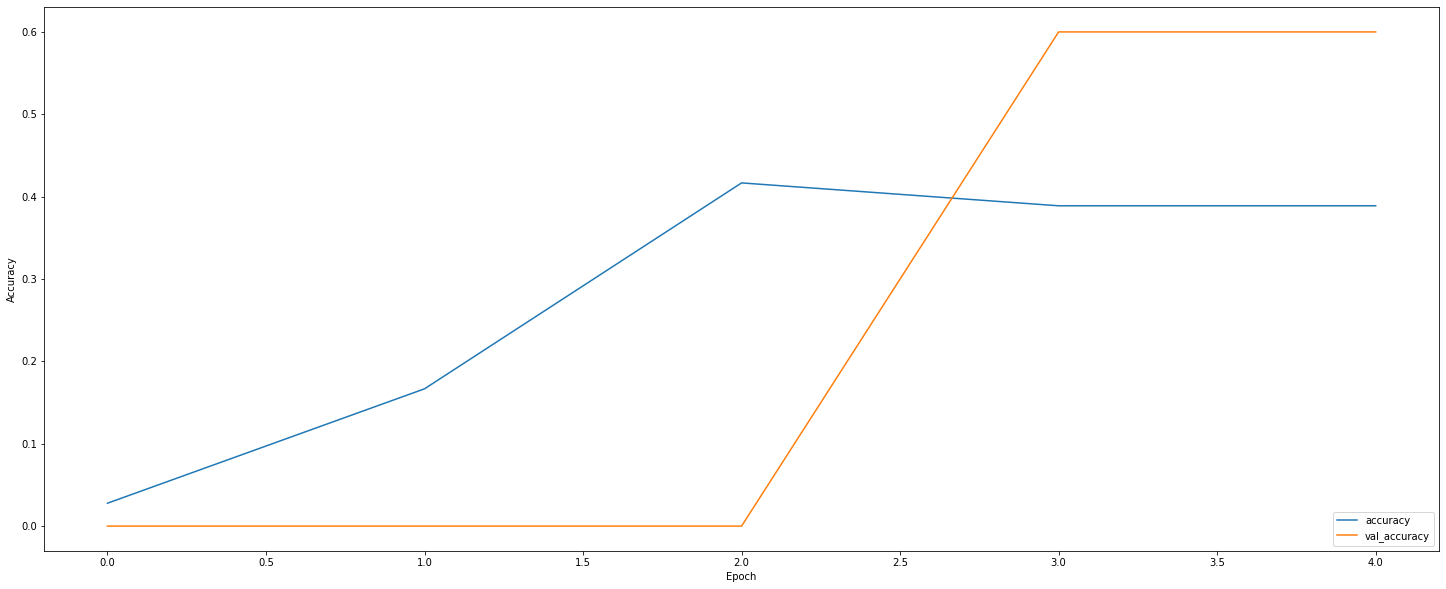

In [17]:
plt.figure(figsize=(25,10))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## Evaluate the model

In [14]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

1/1 - 1s - loss: 3692697858021980439714988032.0000 - accuracy: 0.6000
